In [5]:
import math
import pandas as pd

def it_features(histogram, features, normalized = False):
    
    it = []
    
    if "permutation_entropy" in features:
        pe = permutation_entropy(histogram, normalized)
        it.append(pe)
        
    if "statistical_complexity" in features:
        if "permutation_entropy" in features:
            sc = statistical_complexity(histogram, entropy = pe)
        else:
            sc = statistical_complexity(histogram)
            
        it.append(sc)
            
    if "fisher_information" in features:
        fi = fisher_information(histogram)
        it.append(fi)

    return it



def permutation_entropy(dist, normalized = False):

    pe = 0

    for p in dist:    
        if p > 1e-30:        
            pe -= (p*math.log(p))

    if (normalized == True):
        pe = pe/math.log(len(dist))

    return pe


def statistical_complexity(dist, entropy = None):

    if entropy is None:
        entropy = permutation_entropy(dist, normalized = False)

    # the length of the probabilities, 
    n = len(dist)

    # the reference distribution (uniform)
    P_u = [1/n]*n

    # the Jensen-shannon divergence
    pe_pu = permutation_entropy(P_u)/2
    pe_op = permutation_entropy(dist)/2

    p1 = [(x + y)/2 for x, y in zip(dist, P_u)]
    pe_op_pu = permutation_entropy(p1)

    JS = pe_op_pu - pe_op - pe_pu

    # the statistical complexity
    # math.log is ln
    p2 = (((n+1)/n) * math.log(n + 1) - 2*math.log(2*n) + math.log(n))
    Q_0 = -2*(1/p2)
    Q = Q_0 * JS
    C = Q*entropy

    return C


def fisher_information(dist):

    n = len(dist)

    if dist[0] == 1 or dist[n - 1] == 1:
        F_0 = 1

    else:
        F_0 = 1/2


    aux0 = [math.sqrt(dist[i]) for i in range(1, n)]
    aux1 = [math.sqrt(dist[i]) for i in range(0, n - 1)]
    aux = [(x - y)**2 for x,y in zip(aux0, aux1)]
    F = F_0 * sum(aux)

    return F

In [10]:
import random
from collections import Counter

### para uma unica lista
data = random.choices(list(range(1, 30)), k = 100)

## se nao for usar OP, faça um histograma mais ou menos assim
frequency = Counter(sorted(data)).values()
histogram = [x/sum(frequency) for x in frequency]
features  = ["permutation_entropy", "statistical_complexity"]

result = it_features(histogram, features)
print(result)

#### OU vc pode chamar cada feature separadas
pe = permutation_entropy(histogram, normalized = True)
print(pe)

[3.2229421112195835, 0.18842712268145806]
0.9571306692208654


In [7]:
import numpy as np

### para um numpy array
data = np.array([random.choices(list(range(1, 30)), k = 100) for x in range(3)])

features  = ["permutation_entropy", "statistical_complexity"]

results = []

for d in data:
    frequency = Counter(sorted(d)).values()
    histogram = [x/sum(frequency) for x in frequency]
    
#     result = it_features(histogram, features)
    result = [permutation_entropy(histogram, normalized = True), statistical_complexity(histogram)]
    ## pra plotar no plano entropia-complexidade, se nao me engano, PE tem que ser normalizada, 
    # mas SC tem que pegar uma PE não normalizada
    
    results.append(result)    

[Text(0.5, 0, 'Permutation Entropy'), Text(0, 0.5, 'Statistical Complexity')]

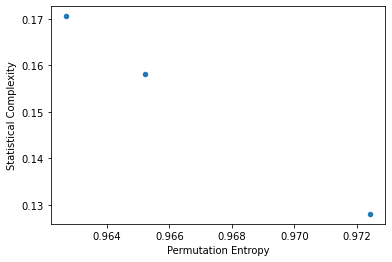

In [8]:
import matplotlib.pyplot as plt

xname = 'Permutation Entropy'
yname = 'Statistical Complexity'

df = pd.DataFrame(results, columns = [xname, yname])

ax = df.plot(kind='scatter', x=xname, y=yname)
 
ax.set(xlabel=xname, ylabel=yname)